### Importing Libraries

In [2]:
# Print all outputs in one Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading of Datasets

In [4]:
df_18 = pd.read_csv("ipeds2018.csv", index_col = 0)
df_19 = pd.read_csv("ipeds2019.csv", index_col = 0)
df_20 = pd.read_csv("ipeds2020.csv", index_col = 0)
df_21 = pd.read_csv("ipeds2021.csv", index_col = 0)
df_22 = pd.read_csv("ipeds2022.csv", index_col = 0)

df = pd.concat([df_18, df_19, df_20, df_21, df_22])

### Exploratory Data Analysis (EDA)

In [6]:
# Glimpse of Dataset before cleaning (If required)
df.head(10)

,INSTNM,year,APPLCN,ADMSSN,ENRLT,DVADM04,FIPS,OPEFLAG,DEGGRANT,INSTCAT,C18BASIC,DISTNCED,FT_FTUG,OPENADMP,ADMCON7,UAGRNTA,RET_PCF,chg1py3,C21BASIC
UNITID,,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,2018,9638,8661,1529,18,1,1,1,2,18,2,1,2,1,9704,61,NaN,NaN
100663,University of Alabama at Birmingham,2018,7845,7226,2299,32,1,1,1,2,15,2,1,2,1,8292,82,NaN,NaN
100690,Amridge University,2018,,,,,1,1,1,2,20,1,1,1,,4163,,NaN,NaN
100706,University of Alabama in Huntsville,2018,4543,3674,1435,39,1,1,1,2,16,2,1,2,1,8916,83,NaN,NaN
100724,Alabama State University,2018,7783,7607,1038,14,1,1,1,2,19,2,1,2,1,8405,59,NaN,NaN
100751,The University of Alabama,2018,37302,22032,6663,30,1,1,1,2,15,2,1,2,1,14968,88,NaN,NaN
100812,Athens State University,2018,,,,,1,1,1,2,22,2,2,-2,,4746,,NaN,NaN
100830,Auburn University at Montgomery,2018,5941,5514,757,14,1,1,1,2,18,2,1,2,1,7442,67,NaN,NaN
100858,Auburn University,2018,20742,15645,4783,31,1,1,1,2,15,2,1,2,1,9062,90,NaN,NaN


In [7]:
# Dimension of Data
print("No. of Rows: {}".format(df.shape[0]))
print("No. of Columns: {}".format(df.shape[1]))

No. of Rows: 7785
No. of Columns: 19


In [8]:
# Checking of Null Values
df.isna().sum()

INSTNM         0
year           0
APPLCN         0
ADMSSN         0
ENRLT          0
DVADM04        0
FIPS           0
OPEFLAG        0
DEGGRANT       0
INSTCAT        0
C18BASIC    3114
DISTNCED       0
FT_FTUG        0
OPENADMP       0
ADMCON7        0
UAGRNTA        0
RET_PCF        0
chg1py3     3114
C21BASIC    4671
dtype: int64

In [9]:
# Modifying the Field Names
df.columns = [
                'inst_name', 'year', 'total_applied', 'total_admitted', 'total_enrolled', 'admissions_yield',
                'fips_state_code', 'title_iv_inst', 'degree_granting', 'inst_category', 'carnegie_class_18',
                'distance_ed', 'ftft_enroll', 'open_admission', 'test_optional', 'avg_finaid', 'retention_rate',
                'tuition', 'carnegie_class_21'
            ]

#Modifying the Index Name
df = df.rename_axis("unit_id")

# Verify the names
df.head()

,inst_name,year,total_applied,total_admitted,total_enrolled,admissions_yield,fips_state_code,title_iv_inst,degree_granting,inst_category,carnegie_class_18,distance_ed,ftft_enroll,open_admission,test_optional,avg_finaid,retention_rate,tuition,carnegie_class_21
unit_id,,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,2018,9638,8661,1529,18,1,1,1,2,18,2,1,2,1,9704,61,NaN,NaN
100663,University of Alabama at Birmingham,2018,7845,7226,2299,32,1,1,1,2,15,2,1,2,1,8292,82,NaN,NaN
100690,Amridge University,2018,,,,,1,1,1,2,20,1,1,1,,4163,,NaN,NaN
100706,University of Alabama in Huntsville,2018,4543,3674,1435,39,1,1,1,2,16,2,1,2,1,8916,83,NaN,NaN
100724,Alabama State University,2018,7783,7607,1038,14,1,1,1,2,19,2,1,2,1,8405,59,NaN,NaN


In [10]:
# Removing the columns which are not Required
df.drop('tuition', axis = 1, inplace = True)
df.head()

,inst_name,year,total_applied,total_admitted,total_enrolled,admissions_yield,fips_state_code,title_iv_inst,degree_granting,inst_category,carnegie_class_18,distance_ed,ftft_enroll,open_admission,test_optional,avg_finaid,retention_rate,carnegie_class_21
unit_id,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,2018,9638,8661,1529,18,1,1,1,2,18,2,1,2,1,9704,61,NaN
100663,University of Alabama at Birmingham,2018,7845,7226,2299,32,1,1,1,2,15,2,1,2,1,8292,82,NaN
100690,Amridge University,2018,,,,,1,1,1,2,20,1,1,1,,4163,,NaN
100706,University of Alabama in Huntsville,2018,4543,3674,1435,39,1,1,1,2,16,2,1,2,1,8916,83,NaN
100724,Alabama State University,2018,7783,7607,1038,14,1,1,1,2,19,2,1,2,1,8405,59,NaN


In [11]:
# Replacing NaN and Whitespace with 0
df.replace(np.nan, 0, regex = True, inplace = True) # Replacing NaN
df.replace(r'^\s+$', 0, regex = True, inplace = True) # Replacing Whitespace

# Verify the Change
df.head()

,inst_name,year,total_applied,total_admitted,total_enrolled,admissions_yield,fips_state_code,title_iv_inst,degree_granting,inst_category,carnegie_class_18,distance_ed,ftft_enroll,open_admission,test_optional,avg_finaid,retention_rate,carnegie_class_21
unit_id,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,2018,9638,8661,1529,18,1,1,1,2,18,2,1,2,1,9704,61,0
100663,University of Alabama at Birmingham,2018,7845,7226,2299,32,1,1,1,2,15,2,1,2,1,8292,82,0
100690,Amridge University,2018,0,0,0,0,1,1,1,2,20,1,1,1,0,4163,0,0
100706,University of Alabama in Huntsville,2018,4543,3674,1435,39,1,1,1,2,16,2,1,2,1,8916,83,0
100724,Alabama State University,2018,7783,7607,1038,14,1,1,1,2,19,2,1,2,1,8405,59,0


In [12]:
# Recheck for Null Values
df.isna().sum()

inst_name            0
year                 0
total_applied        0
total_admitted       0
total_enrolled       0
admissions_yield     0
fips_state_code      0
title_iv_inst        0
degree_granting      0
inst_category        0
carnegie_class_18    0
distance_ed          0
ftft_enroll          0
open_admission       0
test_optional        0
avg_finaid           0
retention_rate       0
carnegie_class_21    0
dtype: int64

In [13]:
# Checking the Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7785 entries, 100654 to 498571
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   inst_name          7785 non-null   object
 1   year               7785 non-null   int64 
 2   total_applied      7785 non-null   object
 3   total_admitted     7785 non-null   object
 4   total_enrolled     7785 non-null   object
 5   admissions_yield   7785 non-null   object
 6   fips_state_code    7785 non-null   object
 7   title_iv_inst      7785 non-null   object
 8   degree_granting    7785 non-null   object
 9   inst_category      7785 non-null   object
 10  carnegie_class_18  7785 non-null   object
 11  distance_ed        7785 non-null   object
 12  ftft_enroll        7785 non-null   object
 13  open_admission     7785 non-null   object
 14  test_optional      7785 non-null   object
 15  avg_finaid         7785 non-null   object
 16  retention_rate     7785 non-null   objec

**Most of the numeric columns are showing as String.**

In [15]:
# Converting Data Type from 'String' to 'Integer'
df[df.columns.difference(['inst_name'])] = df[df.columns.difference(['inst_name'])].astype('int64')

# Verify the Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7785 entries, 100654 to 498571
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   inst_name          7785 non-null   object
 1   year               7785 non-null   int64 
 2   total_applied      7785 non-null   int64 
 3   total_admitted     7785 non-null   int64 
 4   total_enrolled     7785 non-null   int64 
 5   admissions_yield   7785 non-null   int64 
 6   fips_state_code    7785 non-null   int64 
 7   title_iv_inst      7785 non-null   int64 
 8   degree_granting    7785 non-null   int64 
 9   inst_category      7785 non-null   int64 
 10  carnegie_class_18  7785 non-null   int64 
 11  distance_ed        7785 non-null   int64 
 12  ftft_enroll        7785 non-null   int64 
 13  open_admission     7785 non-null   int64 
 14  test_optional      7785 non-null   int64 
 15  avg_finaid         7785 non-null   int64 
 16  retention_rate     7785 non-null   int64

### Filtering Variables as required for this Project analysis

For each variable, these are the values we want to include:
* Total applied: exclude missing values
* Total admitted: exclude missing values
* Total enrolled: exclude missing values
* Institutional category: (2) Degree-granting, primarily baccalaureate or above
* Carnegie Classification 2021: Basic : (15) Doctoral Universities: Very High Research Activity, (16) Doctoral Universities: High Research Activity, (17) Doctoral/Professional Universities, (18) Master's Colleges & Universities: Larger Programs, (19) Master's Colleges & Universities: Medium Programs, (21) Baccalaureate Colleges: Arts & Sciences Focus, (22) Baccalaureate Colleges: Diverse Fields
* Carnegie Classification 2018: Basic : Same as 2021 above
* Degree granting: (1) Degree-granting
* Open admission: (2) No
* Full time first-year degree/certificate-seeking students enrolled: (1) Yes
* Distance education: (2) No
* Title IV eligibility indicator code: (1) Participates in Title IV federal financial aid programs, (2) Branch campus of a main campus that participates in Title IV, (4) New participants (became eligible during winter collection), (8) New participants (became eligible during spring collection)
* Test optional: exclude (2) Not applicable

In [17]:
# Filtering the data
df = df[df["total_applied"] != 0]
df = df[df["total_admitted"] != 0]
df = df[df["total_enrolled"] != 0]
df = df[df["inst_category"] == 2]
df = df[df["carnegie_class_21"].isin([0,15,16,17,18,19,21,22])]
df = df[df["carnegie_class_18"].isin([0,15,16,17,18,19,21,22])]
df = df[df["degree_granting"] == 1]
df = df[df["open_admission"] == 2]
df = df[df["ftft_enroll"] == 1]
df = df[df["distance_ed"] == 2]
df = df[df["title_iv_inst"].isin([1,2,4,8])]
df = df[df["test_optional"] != 2]

# Dimension of Data after Filtering
print("Dimesion of Data after Filtering")
print("No. of Rows: {}".format(df.shape[0]))
print("No. of Columns: {}".format(df.shape[1]))

# Glimpse of Data after Filtering
df.head()

Dimesion of Data after Filtering
No. of Rows: 5673
No. of Columns: 18


,inst_name,year,total_applied,total_admitted,total_enrolled,admissions_yield,fips_state_code,title_iv_inst,degree_granting,inst_category,carnegie_class_18,distance_ed,ftft_enroll,open_admission,test_optional,avg_finaid,retention_rate,carnegie_class_21
unit_id,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,2018,9638,8661,1529,18,1,1,1,2,18,2,1,2,1,9704,61,0
100663,University of Alabama at Birmingham,2018,7845,7226,2299,32,1,1,1,2,15,2,1,2,1,8292,82,0
100706,University of Alabama in Huntsville,2018,4543,3674,1435,39,1,1,1,2,16,2,1,2,1,8916,83,0
100724,Alabama State University,2018,7783,7607,1038,14,1,1,1,2,19,2,1,2,1,8405,59,0
100751,The University of Alabama,2018,37302,22032,6663,30,1,1,1,2,15,2,1,2,1,14968,88,0


In [18]:
print("Total Universities: {}".format(df.inst_name.nunique()))

Total Universities: 1291


**After keeping the required data, there are 1291 universities in total.**

## **<font color = "purple"> Central Research Question</font>**

#### **What is the impact of becoming Test Optional, on the undergraduate admissions funnels of higher education institutions?**

#### Hypothesis 1: Compared to before becoming Test Optional, schools received more applications.

<ul>
    <li>Application Year pre- vs. post-Test Optional</li>
    <li>Total number of students who applied</li>
</ul>

Hypothesis 1 would be supported if, post-Test Optional, there was a significant increase in the volume of applications.

**Hypothesis 1 is analyzed by answering the following questions:**

<ul>
    <li>In which year did ‘Santa Clara University’ adopt the Test-Optional policy?</li>
    <li>How many universities are there who became test-optional in the same year as SCU?</li>
    <li>How many universities' application volume increased after adopting Test-Optional?</li>
    <li>How many universities' application volume decreased after adopting Test-Optional?</li>
    <li>Application for ‘Santa Clara University’ increased or decreased after becoming Test-Optional?</li>
</ul>

In [22]:
# Test Indicator
# 1 - Required to be considered for Admissions
# 5 - Not required for Admissions, but considered if submitted (Test Optional)

# Creating Sub-Dataframe for Apply Stage
applied_df = df[df['inst_name'] == 'Santa Clara University'][["inst_name", "year", "total_applied", "test_optional"]]
applied_df["applied_proportion"] = ((applied_df.total_applied / applied_df.total_applied.sum()) * 100).round(2)

# Glimpse of Data
applied_df

,inst_name,year,total_applied,test_optional,applied_proportion
unit_id,,,,,
122931,Santa Clara University,2018,16242,1,19.68
122931,Santa Clara University,2019,16300,1,19.75
122931,Santa Clara University,2020,16488,1,19.98
122931,Santa Clara University,2021,16848,5,20.41
122931,Santa Clara University,2022,16650,5,20.17


Text(0.5, 0.98, 'SCU Performance at Application Stage')

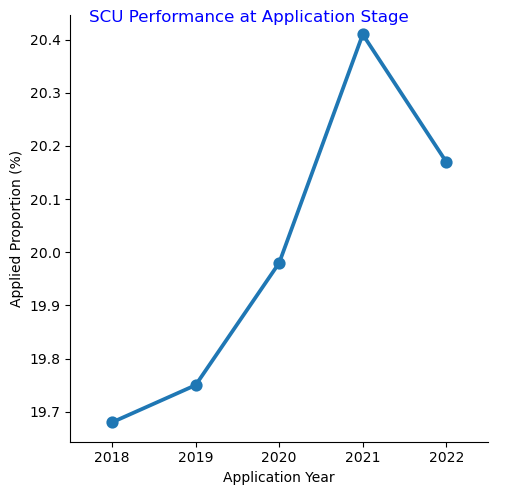

In [23]:
applied_chart = sns.catplot(data = applied_df, y = 'applied_proportion', x = "year", kind = "point").\
                set(xlabel = "Application Year", ylabel = "Applied Proportion (%)")

applied_chart.fig.suptitle("SCU Performance at Application Stage", fontsize = 12, color = "blue")

**Santa Clara University became test optional from 2021 onwards. Further, will target those Universities who followed the same Strategy.**

In [25]:
# Filter universities where tests were mandatory (2018, 2019, 2020)
pre_test_applied = df[(df.year.isin([2018, 2019, 2020])) & (df.test_optional == 1)].groupby("inst_name")["year"].nunique()

# Select universities that were mandatory in all 3 years (2018, 2019, 2020)
pre_test_applied_inst = pre_test_applied[pre_test_applied == 3].index

# Filter universities where tests were optional (2021, 2022)
post_test_applied = df[(df.year.isin([2021, 2022])) & (df.test_optional ==5)].groupby("inst_name")["year"].nunique()

# Select universities that were mandatory in both years (2021, 2022)
post_test_applied_inst = post_test_applied[post_test_applied == 2].index

# Search for universities that satisfies both the conditions
eligible_uni = set(pre_test_applied_inst) & set(post_test_applied_inst)

# Filter of Universities from Original Dataframe
applied_df_filter = df[(df.inst_name.isin(eligible_uni)) & (df.year.isin([2018, 2019, 2020, 2021, 2022]))]

# Display Similar universities as 'Santa Clara University' (Excluding SCU)
similar_applied_inst = applied_df_filter[applied_df_filter.inst_name != 'Santa Clara University'].sort_values(by = ["inst_name", "year"])

# Count of Similar Universities
print("No. of Similar Universities: {}".format(similar_applied_inst.inst_name.nunique()))

# Glimpse of the data
similar_applied_inst.head(10)

No. of Similar Universities: 232


,inst_name,year,total_applied,total_admitted,total_enrolled,admissions_yield,fips_state_code,title_iv_inst,degree_granting,inst_category,carnegie_class_18,distance_ed,ftft_enroll,open_admission,test_optional,avg_finaid,retention_rate,carnegie_class_21
unit_id,,,,,,,,,,,,,,,,,,
126182,Adams State University,2018,1698,1675,460,27,8,1,1,2,18,2,1,2,1,8361,54,0
126182,Adams State University,2019,1765,1749,399,23,8,1,1,2,18,2,1,2,1,8765,59,0
126182,Adams State University,2020,1690,1688,348,21,8,1,1,2,18,2,1,2,1,9585,59,0
126182,Adams State University,2021,1717,1714,318,19,8,1,1,2,0,2,1,2,5,9891,59,18
126182,Adams State University,2022,1580,1567,303,19,8,1,1,2,0,2,1,2,5,10146,57,18
188429,Adelphi University,2018,13006,9648,1245,13,36,1,1,2,17,2,1,2,1,17920,80,0
188429,Adelphi University,2019,13919,10342,1132,11,36,1,1,2,17,2,1,2,1,19075,79,0
188429,Adelphi University,2020,15329,11437,996,9,36,1,1,2,17,2,1,2,1,20561,82,0
188429,Adelphi University,2021,16084,12459,1330,11,36,1,1,2,0,2,1,2,5,22825,83,17


**Out of 1291 universities, there are 232 additional universities who followed the same policy to become Test Optional like SCU.**

#### **Checking Universities where the Volume of Application increased after opting Test-Optional**

In [28]:
applied_df_filter = applied_df_filter.sort_values(by = ["inst_name", "year"])

# Calculate the total applications in Pre-Test Optional Years
pre_test_applied = applied_df_filter[applied_df_filter.year.isin([2018,2019,2020])].groupby("inst_name")["total_applied"].sum()

# Calculate the total applications in Post-Test Optional Years
post_test_applied = applied_df_filter[applied_df_filter.year.isin([2021,2022])].groupby("inst_name")["total_applied"].sum()

# Combine both Pre- and Post- Test optional data into Dataframe
applied_comparison = pd.DataFrame({"pre_test_application" : pre_test_applied, "post_test_application" : post_test_applied}).fillna(0)

# Filter universities whose number of applications increased after opting Test Optional
applied_gain = applied_comparison[applied_comparison.post_test_application > applied_comparison.pre_test_application]

# Add column for increase application in terms of percentage
applied_gain["gain"] = (((applied_gain.post_test_application - applied_gain.pre_test_application) / applied_gain.pre_test_application) * 100).round(2)

# Display the table
applied_gain.sort_values(by = "gain", ascending = False)

,pre_test_application,post_test_application,gain
inst_name,,,
Arizona Christian University,1603,2538,58.33
Dallas Baptist University,10702,15435,44.23
Bethany College,8007,11321,41.39
Colgate University,28250,38649,36.81
Ottawa University-Ottawa,4176,5413,29.62
Morgan State University,26409,32409,22.72
Clemson University,86515,99826,15.39
Northwest Nazarene University,5505,6237,13.30
North Carolina A & T State University,42537,47290,11.17


In [29]:
print("There are {} universities where number of applications were increased after opting Test Optional (Post-Covid).".format(len(applied_gain)))

There are 14 universities where number of applications were increased after opting Test Optional (Post-Covid).


Text(0.5, 0.98, 'Percentage Increase in Applications After Test-Optional')

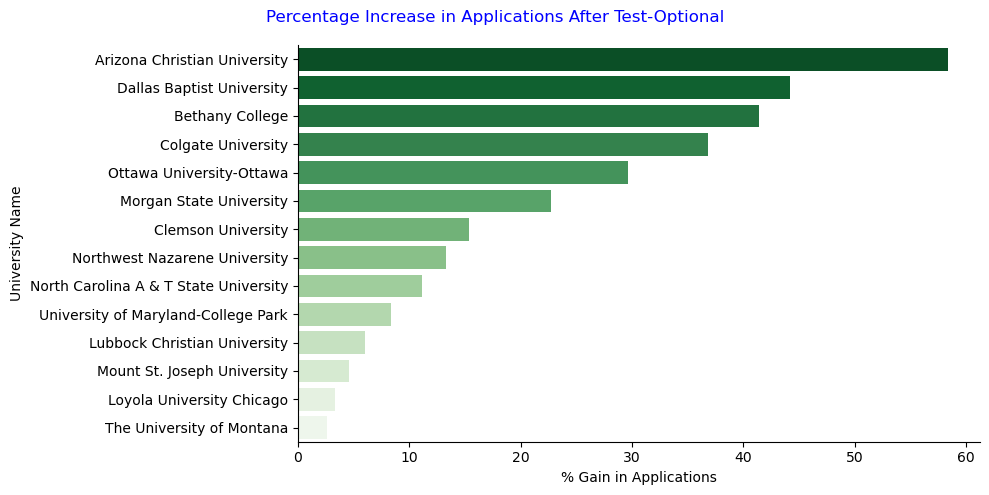

In [30]:
sort_applied_gain = applied_gain.sort_values(by = "gain", ascending = False)

gain_graph = sns.catplot(data = sort_applied_gain, y = "inst_name", x = "gain", kind = "bar",
                         aspect = 2, palette = "Greens_r").set(xlabel = "% Gain in Applications", ylabel = "University Name")

gain_graph.fig.suptitle("Percentage Increase in Applications After Test-Optional", fontsize = 12, color = "blue")
gain_graph.fig.subplots_adjust(top=0.92)
gain_graph.fig.tight_layout()

#### **Checking Universities where the Volume of Application decreased after opting Test-Optional**

In [32]:
# Filter universities whose number of applications decreased after opting Test Optional
applied_decrease = applied_comparison[applied_comparison.post_test_application < applied_comparison.pre_test_application]

# Add Column for Decrease Application in terms of percentage
applied_decrease["decrease"] = (((applied_comparison.post_test_application - applied_comparison.pre_test_application) / 
                                 applied_comparison.pre_test_application) * 100).round(2).abs()

# Display the Table
applied_decrease.sort_values(by = "decrease", ascending = False)

,pre_test_application,post_test_application,decrease
inst_name,,,
Alice Lloyd College,13070,4097,68.65
Alderson Broaddus University,10094,3429,66.03
Gordon College,8570,2911,66.03
Barton College,11620,4084,64.85
Millsaps College,12180,4430,63.63
...,...,...,...
Tufts University,67394,66080,1.95
Columbia University in the City of New York,123857,121989,1.51
Friends University,3492,3446,1.32


Looking for 'Santa Clara University' by what percent it got decreased.

In [34]:
applied_decrease[applied_decrease.index == 'Santa Clara University']

,pre_test_application,post_test_application,decrease
inst_name,,,
Santa Clara University,49030,33498,31.68


**Santa Clara University got decreased by 31.68% after opting for Test-Optional.**

In [36]:
print("There are {} universities where the number of applications were decreased after opting Test-Optional (Post-Covid).".format(len(applied_decrease)))

There are 219 universities where the number of applications were decreased after opting Test-Optional (Post-Covid).


### Summary of Hypothesis 1

In [38]:
summary_df = pd.DataFrame({
                            "Particular" : ["Application Volume Increase", "Application Volume Decrease"],
                            "Number" : [len(applied_gain), len(applied_decrease)],
                            "Proportion": [(len(applied_gain) / (len(applied_gain)+len(applied_decrease)))*100, 
                                           (len(applied_decrease) / (len(applied_gain)+len(applied_decrease)))*100]
                        })
summary_df["Proportion"] = summary_df["Proportion"].round()
summary_df

,Particular,Number,Proportion
0,Application Volume Increase,14,6.0
1,Application Volume Decrease,219,94.0


**Interpretation of Apply Stage**

<ul>
    <li>'Santa Clara University' became test optional in 2021 following the Covid-19 pandemic</li>
    <li>There are 232 institutions, apart from 'Santa Clara University', that adopted a test-optional policy starting in 2021, bringing the total to 233 institutions</li>
    <li>Out of 233 institutions, only 6% of institutions experienced a significant increase in application volume</li>
    <li>Post adopting test optional, number of applications for Santa Clara University reduced by 32%</li>
    <li>Hence, hypothesis 1 is not supported</li>
</ul>

#### **Hypothesis 2: Compared to before becoming Test Optional, schools admitted a lower percentage of students that applied**

<ul>
    <li>Application Year pre- vs. post-Test Optional</li>
    <li>Total number of students accepted, as percentage of students that applied</li>
</ul>

Hypothesis 2 would be supported if, post-Test Optional, there was a significant decrease in the acceptance rate.

**Hypothesis 2 is analyzed by answering the following questions:**

<ul>
    <li>Compare the total applied and total admitted for each year</li>
    <li>Universities with increased application volume after adopting Test-Optional, what was their acceptance rate?</li>
    <li>Among the increased Application volume, which universities' Acceptance Rate increased after adopting Test-Optional?</li>
    <li>Among the increased Application volume, which universities' Acceptance Rate decreased after adopting Test-Optional?</li>
    <li>Among the decreased Application volume, which universities' Acceptance Rate increased after adopting Test-Optional?</li>
    <li>Among the decreased Application volume, which universities' Acceptance Rate decreased after adopting Test-Optional?</li>
    <li>Acceptance Rate for ‘Santa Clara University’ increased or decreased after becoming Test-Optional?</li>
</ul>

In [41]:
# Filter the columns required at Admission Stage
admitted_df = applied_df_filter[["inst_name", "year", "total_applied", "total_admitted", "test_optional"]]

# Glimpse of Data
admitted_df

,inst_name,year,total_applied,total_admitted,test_optional
unit_id,,,,,
126182,Adams State University,2018,1698,1675,1
126182,Adams State University,2019,1765,1749,1
126182,Adams State University,2020,1690,1688,1
126182,Adams State University,2021,1717,1714,5
126182,Adams State University,2022,1580,1567,5
...,...,...,...,...,...
206604,Wright State University-Main Campus,2018,5820,5523,1
206604,Wright State University-Main Campus,2019,5849,5583,1
206604,Wright State University-Main Campus,2020,5226,4998,1


In [42]:
# Adding columns to check the acceptance rate
admitted_df["acceptance_rate"] = ((admitted_df.total_admitted / admitted_df.total_applied)*100).round(2)

# Sort the data
admitted_df.sort_values(by = ["inst_name", "acceptance_rate"], ascending = [True, False])

,inst_name,year,total_applied,total_admitted,test_optional,acceptance_rate
unit_id,,,,,,
126182,Adams State University,2020,1690,1688,1,99.88
126182,Adams State University,2021,1717,1714,5,99.83
126182,Adams State University,2022,1580,1567,5,99.18
126182,Adams State University,2019,1765,1749,1,99.09
126182,Adams State University,2018,1698,1675,1,98.65
...,...,...,...,...,...,...
206604,Wright State University-Main Campus,2021,6338,6087,5,96.04
206604,Wright State University-Main Campus,2020,5226,4998,1,95.64
206604,Wright State University-Main Campus,2019,5849,5583,1,95.45


In [43]:
admitted_df[admitted_df.acceptance_rate == admitted_df.acceptance_rate.max()]
admitted_df[admitted_df.acceptance_rate == admitted_df.acceptance_rate.min()]

,inst_name,year,total_applied,total_admitted,test_optional,acceptance_rate
unit_id,,,,,,
194161,Alliance University,2022,285,285,5,100.0
200059,Dickinson State University,2018,345,345,1,100.0


,inst_name,year,total_applied,total_admitted,test_optional,acceptance_rate
unit_id,,,,,,
166027,Harvard University,2022,61221,1984,5,3.24


In [44]:
admitted_df_filter = admitted_df.groupby("year")[["total_applied", "total_admitted"]].agg(sum)
admitted_df_filter["acceptance_rate"] = ((admitted_df_filter.total_admitted / admitted_df_filter.total_applied)*100).round(2)

# Glimpse of the Data
admitted_df_filter

,total_applied,total_admitted,acceptance_rate
year,,,
2018,2561220,1306338,51.00
2019,2622037,1355037,51.68
2020,2618582,1449280,55.35
2021,2953464,1590805,53.86
2022,3112894,1691159,54.33


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='year', ylabel='Count'>

Text(0.5, 1.0, 'Total Applied vs Admitted per Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

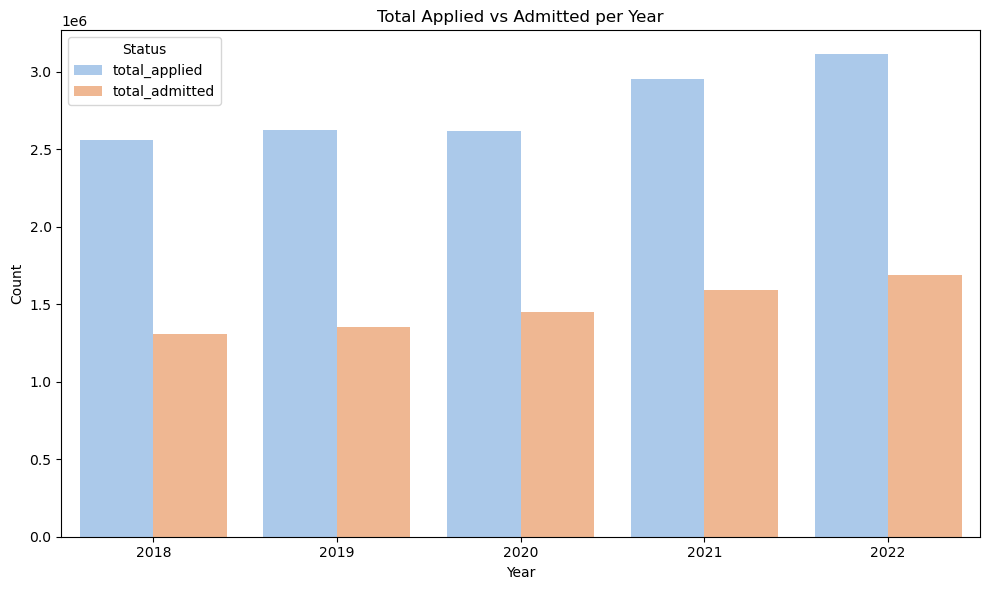

In [45]:
admitted_df_filter = admitted_df_filter.reset_index()

# Melt the dataframe
admitted_long = pd.melt(
                            admitted_df_filter,
                            id_vars='year',
                            value_vars=['total_applied', 'total_admitted'],
                            var_name='Application_Status',
                            value_name='Count'
                        )

# Plot the Visual
plt.figure(figsize=(10, 6))
sns.barplot(data=admitted_long, x='year', y='Count', hue='Application_Status', palette='pastel')
plt.title("Total Applied vs Admitted per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

**Interpretation**

The overall performance of all the US Universities for each year:

<ul>
    <li>With the increasing volume of application every year, on an average the acceptance rate was 53% </li>
    <li>In 2020, there was a slight decline in application volume by 3,455 compared to the previous year. However, the acceptance rate that year was the highest across all years, reaching 55.35%.</li>
</ul>

### **Universities with increased application volume post Covid, what was their acceptance rate?**

In [48]:
applied_gain = applied_gain.reset_index()

In [49]:
admitted_gain = admitted_df[admitted_df.inst_name.isin(applied_gain.inst_name)]

admitted_gain

,inst_name,year,total_applied,total_admitted,test_optional,acceptance_rate
unit_id,,,,,,
105899,Arizona Christian University,2018,404,228,1,56.44
105899,Arizona Christian University,2019,421,286,1,67.93
105899,Arizona Christian University,2020,778,556,1,71.47
105899,Arizona Christian University,2021,1222,928,5,75.94
105899,Arizona Christian University,2022,1316,923,5,70.14
...,...,...,...,...,...,...
163286,University of Maryland-College Park,2018,33497,15796,1,47.16
163286,University of Maryland-College Park,2019,33012,14585,1,44.18
163286,University of Maryland-College Park,2020,32147,16382,1,50.96


#### **Comparison between Pre-Test Optional Vs Post-Test Optional Acceptance Rate**

In [51]:
df_admitted = admitted_gain.sort_values(by = ["inst_name", "year"])

# Calculate the total applications in Pre-Test Optional Years
pre_test_applied = df_admitted[df_admitted.year.isin([2018,2019,2020])].groupby("inst_name")["total_applied"].sum()

# Calculate the total applications in Post-Test Optional Years
post_test_applied = df_admitted[df_admitted.year.isin([2021,2022])].groupby("inst_name")["total_applied"].sum()

# Calculate the total admission in Pre-Test Optional Years
pre_test_admitted = df_admitted[df_admitted.year.isin([2018,2019,2020])].groupby("inst_name")["total_admitted"].agg(sum)

# Calculate the total admission in Post-Test Optional Years
post_test_admitted = df_admitted[df_admitted.year.isin([2021, 2022])].groupby("inst_name")["total_admitted"].agg(sum)

# Combine both Pre- and Post- Test optional data into Dataframe
admitted_comparison = pd.DataFrame({"pre_test_application" : pre_test_applied, "pre_test_admission" : pre_test_admitted,
                                    "post_test_application" : post_test_applied, "post_test_admission" : post_test_admitted}).fillna(0)

admitted_comparison["pre_test_acceptance"] = ((admitted_comparison.pre_test_admission / admitted_comparison.pre_test_application)*100).round(2)

admitted_comparison["post_test_acceptance"] = ((admitted_comparison.post_test_admission / admitted_comparison.post_test_application)*100).round(2)

col_to_move = admitted_comparison.pop('pre_test_acceptance')

admitted_comparison.insert(2, 'pre_test_acceptance', col_to_move)

In [52]:
admitted_comparison

,pre_test_application,pre_test_admission,pre_test_acceptance,post_test_application,post_test_admission,post_test_acceptance
inst_name,,,,,,
Arizona Christian University,1603,1070,66.75,2538,1851,72.93
Bethany College,8007,6380,79.68,11321,7789,68.80
Clemson University,86515,46228,53.43,99826,45842,45.92
Colgate University,28250,7027,24.87,38649,5639,14.59
Dallas Baptist University,10702,9977,93.23,15435,14285,92.55
Loyola University Chicago,76158,52216,68.56,78733,61496,78.11
Lubbock Christian University,1851,1693,91.46,1963,1723,87.77
Morgan State University,26409,18332,69.42,32409,27939,86.21
Mount St. Joseph University,4433,2699,60.88,4638,2742,59.12


#### **Among the increase Application volume, which university's Acceptance Rate increased after adopting Test-Optional?**

In [54]:
admitted_increase = admitted_comparison[admitted_comparison.post_test_acceptance > admitted_comparison.pre_test_acceptance]

admitted_increase = admitted_increase[["pre_test_acceptance", "post_test_acceptance"]]
admitted_increase["difference"] = admitted_increase.post_test_acceptance - admitted_increase.pre_test_acceptance

admitted_increase = admitted_increase.sort_values(by = "difference", ascending = False)
admitted_increase

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Ottawa University-Ottawa,44.61,73.75,29.14
Morgan State University,69.42,86.21,16.79
Northwest Nazarene University,78.35,88.17,9.82
Loyola University Chicago,68.56,78.11,9.55
Arizona Christian University,66.75,72.93,6.18
University of Maryland-College Park,47.40,48.09,0.69


In [55]:
print("{} universities observed increase in Acceptance Rate whose application volume increase after adopting Test-Optional.".format(len(admitted_increase)))

6 universities observed increase in Acceptance Rate whose application volume increase after adopting Test-Optional.


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Acceptance Rate', ylabel='inst_name'>

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

Text(0.5, 1.0, 'Pre vs Post Test Acceptance Rates by University')

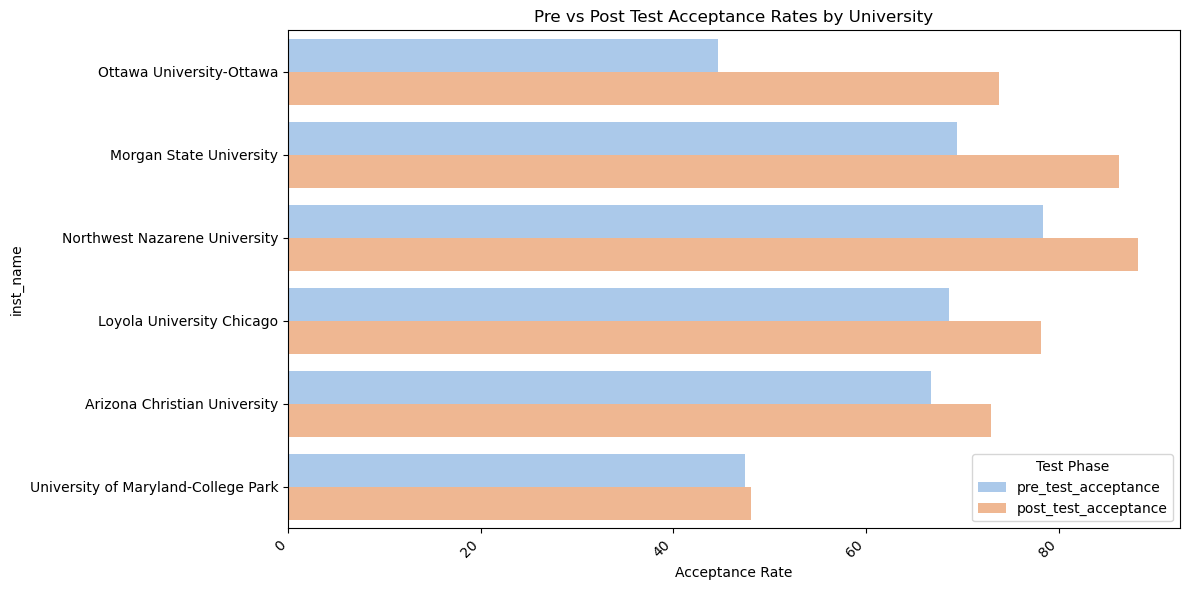

In [56]:
admitted_increase = admitted_increase.reset_index()
admitted_increase = admitted_increase.sort_values(by = "difference", ascending = False)
admitted_melt = pd.melt(
                        admitted_increase,
                        id_vars='inst_name',
                        value_vars=['pre_test_acceptance', 'post_test_acceptance'], 
                        var_name='Test Phase', 
                        value_name='Acceptance Rate'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=admitted_melt, y='inst_name', x='Acceptance Rate', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Acceptance Rates by University')
plt.tight_layout()
plt.show()

#### **Among the increase Application volume, which university's Acceptance Rate decreased after adopting Test-Optional?**

In [58]:
admitted_decrease = admitted_comparison[admitted_comparison.post_test_acceptance < admitted_comparison.pre_test_acceptance]

admitted_decrease = admitted_decrease[["pre_test_acceptance", "post_test_acceptance"]]
admitted_decrease["difference"] = (admitted_decrease.post_test_acceptance - admitted_decrease.pre_test_acceptance).abs()

admitted_decrease = admitted_decrease.sort_values(by = "difference", ascending = False)
admitted_decrease

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Bethany College,79.68,68.80,10.88
Colgate University,24.87,14.59,10.28
Clemson University,53.43,45.92,7.51
Lubbock Christian University,91.46,87.77,3.69
The University of Montana,92.58,89.46,3.12
Mount St. Joseph University,60.88,59.12,1.76
North Carolina A & T State University,58.50,56.82,1.68
Dallas Baptist University,93.23,92.55,0.68


In [59]:
print("{} universities observed decrease in Acceptance Rate whose application volume increased after adopting Test-Optional.".format(len(admitted_decrease)))

8 universities observed decrease in Acceptance Rate whose application volume increased after adopting Test-Optional.


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Acceptance Rate', ylabel='inst_name'>

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

Text(0.5, 1.0, 'Pre vs Post Test Acceptance Rates by University')

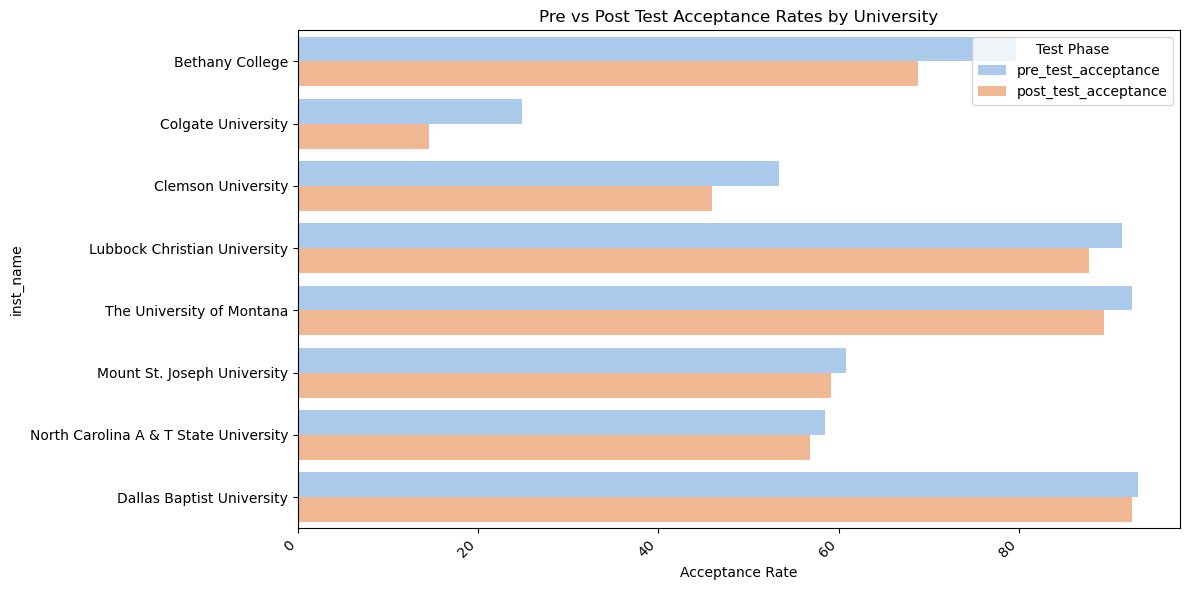

In [60]:
admitted_decrease = admitted_decrease.reset_index()
admitted_decrease = admitted_decrease.sort_values(by = "difference", ascending = False)
admitted_melt_dec = pd.melt(
                        admitted_decrease,
                        id_vars='inst_name',
                        value_vars=['pre_test_acceptance', 'post_test_acceptance'], 
                        var_name='Test Phase', 
                        value_name='Acceptance Rate'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=admitted_melt_dec, y='inst_name', x='Acceptance Rate', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Acceptance Rates by University')
plt.tight_layout()
plt.show()

#### **Among the decrease Application volume, which university's Acceptance Rate increased after adopting Test-Optional?**

In [62]:
applied_decrease = applied_decrease.reset_index()

applied_decrease

,inst_name,pre_test_application,post_test_application,decrease
0,Adams State University,5153,3297,36.02
1,Adelphi University,42254,33385,20.99
2,Adrian College,14790,6065,58.99
3,Alabama A & M University,29072,15467,46.80
4,Alabama State University,21484,12705,40.86
...,...,...,...,...
214,Wilkes University,11321,8817,22.12
215,Winston-Salem State University,13947,13047,6.45
216,Winthrop University,17996,10681,40.65
217,Wright State University-Lake Campus,1352,1289,4.66


In [63]:
admitted_loss = admitted_df[admitted_df.inst_name.isin(applied_decrease.inst_name)]

admitted_loss

,inst_name,year,total_applied,total_admitted,test_optional,acceptance_rate
unit_id,,,,,,
126182,Adams State University,2018,1698,1675,1,98.65
126182,Adams State University,2019,1765,1749,1,99.09
126182,Adams State University,2020,1690,1688,1,99.88
126182,Adams State University,2021,1717,1714,5,99.83
126182,Adams State University,2022,1580,1567,5,99.18
...,...,...,...,...,...,...
206604,Wright State University-Main Campus,2018,5820,5523,1,94.90
206604,Wright State University-Main Campus,2019,5849,5583,1,95.45
206604,Wright State University-Main Campus,2020,5226,4998,1,95.64


#### **Comparison between Pre-Test Optional Vs Post-Test Optional Acceptance Rate**

In [65]:
df2_admitted = admitted_loss.sort_values(by = ["inst_name", "year"])

# Calculate the total applications in Pre-Test Optional Years
pre_test_applied2 = df2_admitted[df2_admitted.year.isin([2018,2019,2020])].groupby("inst_name")["total_applied"].sum()

# Calculate the total applications in Post-Test Optional Years
post_test_applied2 = df2_admitted[df2_admitted.year.isin([2021,2022])].groupby("inst_name")["total_applied"].sum()

# Calculate the total admission in Pre-Test Optional Years
pre_test_admitted2 = df2_admitted[df2_admitted.year.isin([2018,2019,2020])].groupby("inst_name")["total_admitted"].agg(sum)

# Calculate the total admission in Post-Test Optional Years
post_test_admitted2 = df2_admitted[df2_admitted.year.isin([2021, 2022])].groupby("inst_name")["total_admitted"].agg(sum)

# Combine both Pre- and Post- Test optional data into Dataframe
admitted_comparison2 = pd.DataFrame({"pre_test_application" : pre_test_applied2, "pre_test_admission" : pre_test_admitted2,
                                    "post_test_application" : post_test_applied2, "post_test_admission" : post_test_admitted2}).fillna(0)

admitted_comparison2["pre_test_acceptance"] = ((admitted_comparison2.pre_test_admission / admitted_comparison2.pre_test_application)*100).round(2)

admitted_comparison2["post_test_acceptance"] = ((admitted_comparison2.post_test_admission / admitted_comparison2.post_test_application)*100).round(2)

col_to_move2 = admitted_comparison2.pop('pre_test_acceptance')

admitted_comparison2.insert(2, 'pre_test_acceptance', col_to_move2)

In [66]:
admitted_comparison2

,pre_test_application,pre_test_admission,pre_test_acceptance,post_test_application,post_test_admission,post_test_acceptance
inst_name,,,,,,
Adams State University,5153,5112,99.20,3297,3281,99.51
Adelphi University,42254,31427,74.38,33385,25050,75.03
Adrian College,14790,8962,60.59,6065,4378,72.18
Alabama A & M University,29072,26285,90.41,15467,10789,69.75
Alabama State University,21484,21022,97.85,12705,12356,97.25
...,...,...,...,...,...,...
Wilkes University,11321,9229,81.52,8817,8326,94.43
Winston-Salem State University,13947,9591,68.77,13047,10013,76.75
Winthrop University,17996,11975,66.54,10681,7124,66.70


#### **Checking for universities whose Volume of Application decreased but the Acceptance Rate increased**

In [68]:
apv_dec_ar_inc = admitted_comparison2[(admitted_comparison2.pre_test_application > admitted_comparison2.post_test_application) &
                     (admitted_comparison2.pre_test_acceptance < admitted_comparison2.post_test_acceptance)]

In [69]:
print("{} universities observed increased in acceptance rate whose application volume decreased after adopting for Test-Optional.".
      format(apv_dec_ar_inc.reset_index().inst_name.nunique()))

155 universities observed increased in acceptance rate whose application volume decreased after adopting for Test-Optional.


In [70]:
apv_dec_ar_inc = apv_dec_ar_inc[["pre_test_acceptance", "post_test_acceptance"]]

apv_dec_ar_inc["difference"] = apv_dec_ar_inc.post_test_acceptance - apv_dec_ar_inc.pre_test_acceptance

apv_dec_ar_inc = apv_dec_ar_inc.sort_values(by = "difference", ascending = False)

apv_dec_ar_inc

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Barton College,42.63,95.96,53.33
Alice Lloyd College,25.33,66.00,40.67
Culver-Stockton College,57.04,94.08,37.04
Western Carolina University,49.68,82.63,32.95
Benedictine University,54.75,86.38,31.63
...,...,...,...
Wright State University-Main Campus,95.32,95.61,0.29
Longwood University,88.60,88.88,0.28
Winthrop University,66.54,66.70,0.16


In [71]:
apv_dec_ar_inc[apv_dec_ar_inc.index == 'Santa Clara University']

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Santa Clara University,49.82,53.05,3.23


Although the **Santa Clara University's** application volume decreased but its acceptance rate increased by 3.23% from 49.82% after adopting Test-Optional.

In [73]:
min_to_med = apv_dec_ar_inc[(apv_dec_ar_inc.difference >= apv_dec_ar_inc.difference.min()) & 
               (apv_dec_ar_inc.difference < apv_dec_ar_inc.difference.median())]

med_to_max = apv_dec_ar_inc[(apv_dec_ar_inc.difference >= apv_dec_ar_inc.difference.median()) & 
               (apv_dec_ar_inc.difference <= apv_dec_ar_inc.difference.max())]

min_to_med.sort_values(by = "difference", ascending = False)
med_to_max.sort_values(by = "difference", ascending = False)

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Appalachian State University,75.45,83.86,8.41
New Mexico State University-Main Campus,60.76,68.87,8.11
Fordham University,48.17,56.20,8.03
Winston-Salem State University,68.77,76.75,7.98
Missouri Baptist University,59.34,67.27,7.93
...,...,...,...
Wright State University-Main Campus,95.32,95.61,0.29
Longwood University,88.60,88.88,0.28
Winthrop University,66.54,66.70,0.16


,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Barton College,42.63,95.96,53.33
Alice Lloyd College,25.33,66.00,40.67
Culver-Stockton College,57.04,94.08,37.04
Western Carolina University,49.68,82.63,32.95
Benedictine University,54.75,86.38,31.63
...,...,...,...
Elizabeth City State University,66.68,75.37,8.69
The University of Texas at San Antonio,80.03,88.64,8.61
Faulkner University,64.82,73.34,8.52


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Pre-Test Acceptance Rate')

Text(0, 0.5, 'Post-Test Acceptance Rate')

Text(0.5, 1.0, 'Impact of Test-Optional Policy on Acceptance Rates by University')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


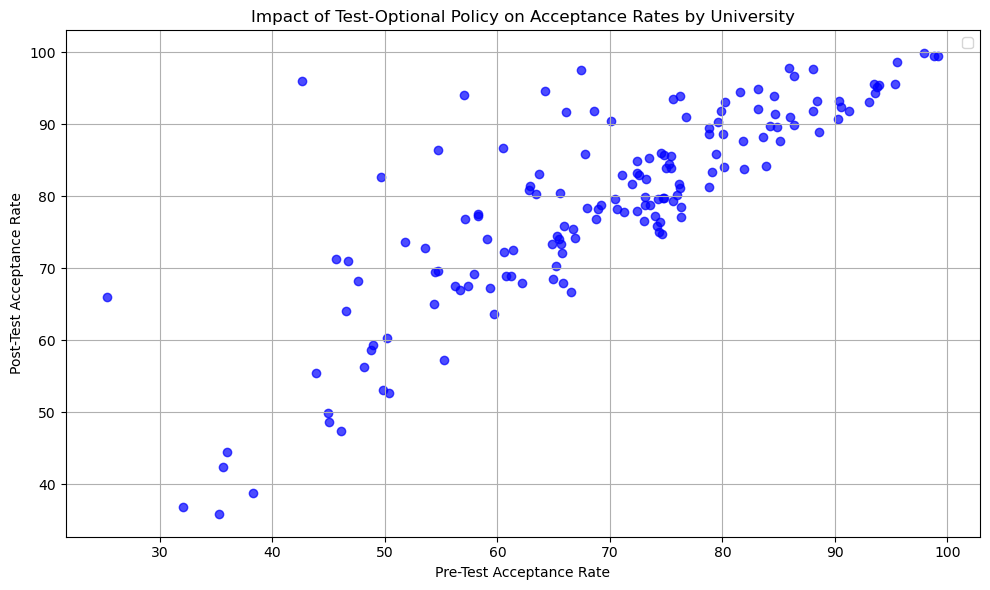

In [74]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(apv_dec_ar_inc['pre_test_acceptance'], apv_dec_ar_inc['post_test_acceptance'], color='blue', alpha=0.7)
plt.xlabel('Pre-Test Acceptance Rate')
plt.ylabel('Post-Test Acceptance Rate')
plt.title('Impact of Test-Optional Policy on Acceptance Rates by University')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Checking for universities whose Volume of Application decreased but also the Acceptance Rate decreased**

In [76]:
apv_dec_ar_dec = admitted_comparison2[(admitted_comparison2.pre_test_application > admitted_comparison2.post_test_application) &
                     (admitted_comparison2.pre_test_acceptance > admitted_comparison2.post_test_acceptance)]

In [77]:
print("{} universities observed decreased in acceptance rate whose application volume decreased after adopting for Test-Optional.".
      format(apv_dec_ar_dec.reset_index().inst_name.nunique()))

64 universities observed decreased in acceptance rate whose application volume decreased after adopting for Test-Optional.


In [78]:
apv_dec_ar_dec = apv_dec_ar_dec[["pre_test_acceptance", "post_test_acceptance"]]

apv_dec_ar_dec["difference"] = (apv_dec_ar_dec.post_test_acceptance - apv_dec_ar_dec.pre_test_acceptance).abs()

apv_dec_ar_dec = apv_dec_ar_dec.sort_values(by = "difference", ascending = False)

apv_dec_ar_dec

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Alabama A & M University,90.41,69.75,20.66
Dickinson State University,99.35,82.58,16.77
John Brown University,69.66,54.69,14.97
Truman State University,66.36,52.27,14.09
Covenant College,97.62,86.31,11.31
...,...,...,...
University of Michigan-Flint,69.70,69.32,0.38
Wright State University-Lake Campus,99.48,99.15,0.33
Claremont McKenna College,10.86,10.79,0.07


In [79]:
min_to_med2 = apv_dec_ar_dec[(apv_dec_ar_dec.difference >= apv_dec_ar_dec.difference.min()) & 
               (apv_dec_ar_dec.difference < apv_dec_ar_dec.difference.median())]

med_to_max2 = apv_dec_ar_dec[(apv_dec_ar_dec.difference >= apv_dec_ar_dec.difference.median()) & 
               (apv_dec_ar_dec.difference <= apv_dec_ar_dec.difference.max())]

med_to_max2.sort_values(by = "difference", ascending = False)
min_to_med2.sort_values(by = "difference", ascending = False)

,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Alabama A & M University,90.41,69.75,20.66
Dickinson State University,99.35,82.58,16.77
John Brown University,69.66,54.69,14.97
Truman State University,66.36,52.27,14.09
Covenant College,97.62,86.31,11.31
Biola University,69.05,58.73,10.32
University of Illinois Urbana-Champaign,61.48,51.19,10.29
Virginia Polytechnic Institute and State Universit,66.90,56.73,10.17
East Central University,77.27,67.62,9.65


,pre_test_acceptance,post_test_acceptance,difference
inst_name,,,
Boston University,20.40,16.44,3.96
University of South Carolina-Columbia,66.76,62.81,3.95
Washington and Lee University,21.20,17.86,3.34
Tulane University of Louisiana,13.64,10.38,3.26
Vanderbilt University,10.12,6.91,3.21
Barnard College,13.05,10.03,3.02
Southwestern Adventist University,58.24,55.30,2.94
Texas State University,81.17,78.53,2.64
University of Missouri-Columbia,80.18,77.85,2.33


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Pre-Test Acceptance Rate')

Text(0, 0.5, 'Post-Test Acceptance Rate')

Text(0.5, 1.0, 'Impact of Test-Optional Policy on Acceptance Rates by University')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


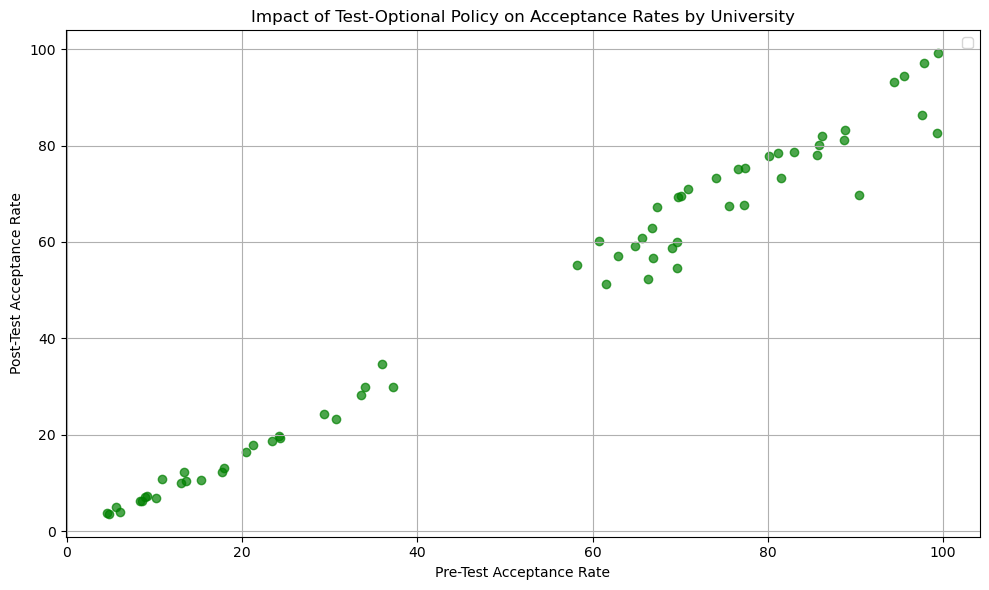

In [80]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(apv_dec_ar_dec['pre_test_acceptance'], apv_dec_ar_dec['post_test_acceptance'], color='green', alpha=0.7)
plt.xlabel('Pre-Test Acceptance Rate')
plt.ylabel('Post-Test Acceptance Rate')
plt.title('Impact of Test-Optional Policy on Acceptance Rates by University')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation of Admit Stage**

<ul>
    <li>6 universities observed increased in Acceptance Rate whose application volume increased after adopting Test-Optional</li>
    <li>8 universities observed decreased in Acceptance Rate whose application volume increased after adopting Test-Optional</li>
    <li>155 universities observed increased in acceptance rate whose application volume decreased after adopting for Test-Optional</li>
    <li>Although the Santa Clara University's application volume decreased but its acceptance rate increased by 3.23% from 49.82% after adopting Test-Optional.</li>
    <li>64 universities observed decreased in acceptance rate whose application volume decreased after adopting for Test-Optional</li>
    <li> As 161 universities (6+155) observed increased in acceptance rate after adopting Test-Optional, hence hypothesis 2 is not supported</li>
</ul>

#### **Hypothesis 3: Compared to before becoming Test Optional, schools enrolled more students as a percentage of students that were accepted**

<ul>
    <li>Application Year pre- vs. post-Test Optional</li>
    <li>Total number of students enrolled, as percentage of students who were accepted</li>
</ul>

Hypothesis 3 would be supported if, post-Test Optional, there was a significant increase in the yield

**Hypothesis 3 is analyzed by answering the following questions:**

<ul>
    <li>Compare the total applied, total admitted and total enrolled for each year</li>
    <li>Among the increased application volume and increased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?</li>
    <li>Among the increased application volume and increased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?</li>
    <li>Among the increased application volume and decreased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?</li>
    <li>Among the increased application volume and decreased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?</li>
    <li>Among the decreased application volume and increased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?</li>
    <li>Among the decreased application volume and increased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?</li>
    <li>Among the decreased application volume and decreased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?</li>
    <li>Among the decreased application volume and decreased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?</li>
    <li>Admission yield for Santa Clara University increased or decreased after adopting test-optional?</li>
</ul>

In [83]:
enrl_df = applied_df_filter[["inst_name", "year", "total_applied", "total_admitted", "total_enrolled", "admissions_yield", "test_optional"]]

enrl_df

,inst_name,year,total_applied,total_admitted,total_enrolled,admissions_yield,test_optional
unit_id,,,,,,,
126182,Adams State University,2018,1698,1675,460,27,1
126182,Adams State University,2019,1765,1749,399,23,1
126182,Adams State University,2020,1690,1688,348,21,1
126182,Adams State University,2021,1717,1714,318,19,5
126182,Adams State University,2022,1580,1567,303,19,5
...,...,...,...,...,...,...,...
206604,Wright State University-Main Campus,2018,5820,5523,1920,35,1
206604,Wright State University-Main Campus,2019,5849,5583,1374,25,1
206604,Wright State University-Main Campus,2020,5226,4998,1181,24,1


#### **Compare the total applied, total admitted and total enrolled for each year**

In [85]:
enrl_df_filter = enrl_df.groupby("year")[["total_applied", "total_admitted", "total_enrolled"]].agg(sum)

enrl_df_filter["yield"] = ((enrl_df_filter.total_enrolled / enrl_df_filter.total_admitted)*100).round(2)

enrl_df_filter

,total_applied,total_admitted,total_enrolled,yield
year,,,,
2018,2561220,1306338,358237,27.42
2019,2622037,1355037,356978,26.34
2020,2618582,1449280,340354,23.48
2021,2953464,1590805,367233,23.08
2022,3112894,1691159,375827,22.22


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='year', ylabel='Count'>

Text(0.5, 1.0, 'Total Applied vs Admitted Vs Enrolled per Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

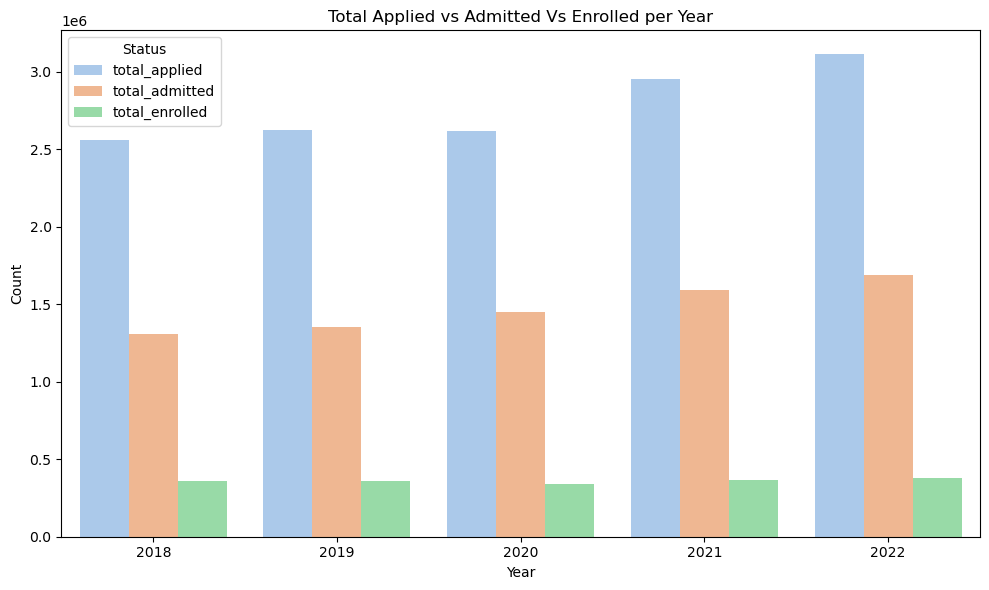

In [86]:
enrl_df_filter = enrl_df_filter.reset_index()

# Melt the dataframe
enrolled_long = pd.melt(
                           enrl_df_filter,
                            id_vars='year',
                            value_vars=['total_applied', 'total_admitted', 'total_enrolled'],
                            var_name='Enroll_Status',
                            value_name='Count'
                        )

# Plot the Visual
plt.figure(figsize=(10, 6))
sns.barplot(data=enrolled_long, x='year', y='Count', hue='Enroll_Status', palette='pastel')
plt.title("Total Applied vs Admitted Vs Enrolled per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

#### **Comparison between Pre- & Post- Test Optional**

In [88]:
enroll_df_main = enrl_df.sort_values(by = ["inst_name", "year"])

# Calculate the total applications in Pre-Test Optional Years
pre_test_applied3 = enroll_df_main[enroll_df_main.year.isin([2018,2019,2020])].groupby("inst_name")["total_applied"].sum()

# Calculate the total applications in Post-Test Optional Years
post_test_applied3 = enroll_df_main[enroll_df_main.year.isin([2021,2022])].groupby("inst_name")["total_applied"].sum()

# Calculate the total admission in Pre-Test Optional Years
pre_test_admitted3 = enroll_df_main[enroll_df_main.year.isin([2018,2019,2020])].groupby("inst_name")["total_admitted"].agg(sum)

# Calculate the total admission in Post-Test Optional Years
post_test_admitted3 = enroll_df_main[enroll_df_main.year.isin([2021, 2022])].groupby("inst_name")["total_admitted"].agg(sum)

# Calculate the total enrollment in Pre-Test Optional Years
pre_test_enrolled = enroll_df_main[enroll_df_main.year.isin([2018,2019,2020])].groupby("inst_name")["total_enrolled"].agg(sum)

# Calculate the total enrollment in Post-Test Optional Years
post_test_enrolled = enroll_df_main[enroll_df_main.year.isin([2021, 2022])].groupby("inst_name")["total_enrolled"].agg(sum)

# Combine both Pre- and Post- Test optional data into Dataframe
enrolled_comparison = pd.DataFrame({
         "pre_test_application":pre_test_applied3,"pre_test_admission":pre_test_admitted3, "pre_test_enrollment":pre_test_enrolled,
         "post_test_application":post_test_applied3,"post_test_admission":post_test_admitted3,"post_test_enrollment":post_test_enrolled
                                   }).fillna(0)

# Adding Admission yield for pre- and post- test optional
enrolled_comparison["pre_test_acceptance"] = ((enrolled_comparison.pre_test_admission / enrolled_comparison.pre_test_application)*100).round(2)
enrolled_comparison["post_test_acceptance"] = ((enrolled_comparison.post_test_admission / enrolled_comparison.post_test_application)*100).round(2)
enrolled_comparison["pre_test_yield"] = ((enrolled_comparison.pre_test_enrollment / enrolled_comparison.pre_test_admission)*100).round(2)
enrolled_comparison["post_test_yield"] = ((enrolled_comparison.post_test_enrollment / enrolled_comparison.post_test_admission)*100).round(2)

enrolled_comparison.head()

,pre_test_application,pre_test_admission,pre_test_enrollment,post_test_application,post_test_admission,post_test_enrollment,pre_test_acceptance,post_test_acceptance,pre_test_yield,post_test_yield
inst_name,,,,,,,,,,
Adams State University,5153,5112,1207,3297,3281,621,99.20,99.51,23.61,18.93
Adelphi University,42254,31427,3373,33385,25050,2476,74.38,75.03,10.73,9.88
Adrian College,14790,8962,1728,6065,4378,1080,60.59,72.18,19.28,24.67
Alabama A & M University,29072,26285,4903,15467,10789,3258,90.41,69.75,18.65,30.20
Alabama State University,21484,21022,3036,12705,12356,1833,97.85,97.25,14.44,14.83


In [89]:
col_to_move3 = enrolled_comparison.pop('pre_test_yield')
enrolled_comparison.insert(3, 'pre_test_yield', col_to_move3)

enrolled_comparison.head()

,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,pre_test_acceptance,post_test_acceptance,post_test_yield
inst_name,,,,,,,,,,
Adams State University,5153,5112,1207,23.61,3297,3281,621,99.20,99.51,18.93
Adelphi University,42254,31427,3373,10.73,33385,25050,2476,74.38,75.03,9.88
Adrian College,14790,8962,1728,19.28,6065,4378,1080,60.59,72.18,24.67
Alabama A & M University,29072,26285,4903,18.65,15467,10789,3258,90.41,69.75,30.20
Alabama State University,21484,21022,3036,14.44,12705,12356,1833,97.85,97.25,14.83


In [90]:
col_to_move4 = enrolled_comparison.pop('pre_test_acceptance')
enrolled_comparison.insert(3, 'pre_test_acceptance', col_to_move4)

enrolled_comparison.head()

,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
inst_name,,,,,,,,,,
Adams State University,5153,5112,1207,99.20,23.61,3297,3281,621,99.51,18.93
Adelphi University,42254,31427,3373,74.38,10.73,33385,25050,2476,75.03,9.88
Adrian College,14790,8962,1728,60.59,19.28,6065,4378,1080,72.18,24.67
Alabama A & M University,29072,26285,4903,90.41,18.65,15467,10789,3258,69.75,30.20
Alabama State University,21484,21022,3036,97.85,14.44,12705,12356,1833,97.25,14.83


In [91]:
enrolled_comparison = enrolled_comparison.reset_index()

#### **Among the increased application volume and increased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?**

In [93]:
ap_inc_ar_inc_ey_inc = enrolled_comparison[(enrolled_comparison.pre_test_application < enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance < enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield < enrolled_comparison.post_test_yield)]

ap_inc_ar_inc_ey_inc

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield


In [94]:
print("{} universities observed increased in Admission Yield whose Application volume and Acceptance Rate increased after adopting Test-Optional".
     format(len(ap_inc_ar_inc_ey_inc)))

0 universities observed increased in Admission Yield whose Application volume and Acceptance Rate increased after adopting Test-Optional


#### **Among the increased application volume and increased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?**

In [96]:
ap_inc_ar_inc_ey_dec = enrolled_comparison[(enrolled_comparison.pre_test_application < enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance < enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield > enrolled_comparison.post_test_yield)]

ap_inc_ar_inc_ey_dec

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
10,Arizona Christian University,1603,1070,662,66.75,61.87,2538,1851,617,72.93,33.33
92,Loyola University Chicago,76158,52216,7529,68.56,14.42,78733,61496,5731,78.11,9.32
107,Morgan State University,26409,18332,3922,69.42,21.39,32409,27939,4527,86.21,16.20
117,Northwest Nazarene University,5505,4313,835,78.35,19.36,6237,5499,514,88.17,9.35
124,Ottawa University-Ottawa,4176,1863,634,44.61,34.03,5413,3992,492,73.75,12.32
181,University of Maryland-College Park,98656,46763,13374,47.40,28.60,106944,51429,11921,48.09,23.18


In [97]:
print("{} universities observed decreased in Admission Yield whose Application volume and Acceptance Rate increased after adopting Test-Optional".
     format(len(ap_inc_ar_inc_ey_dec)))

6 universities observed decreased in Admission Yield whose Application volume and Acceptance Rate increased after adopting Test-Optional


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Yield', ylabel='inst_name'>

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

Text(0.5, 1.0, 'Pre vs Post Test Yield by University')

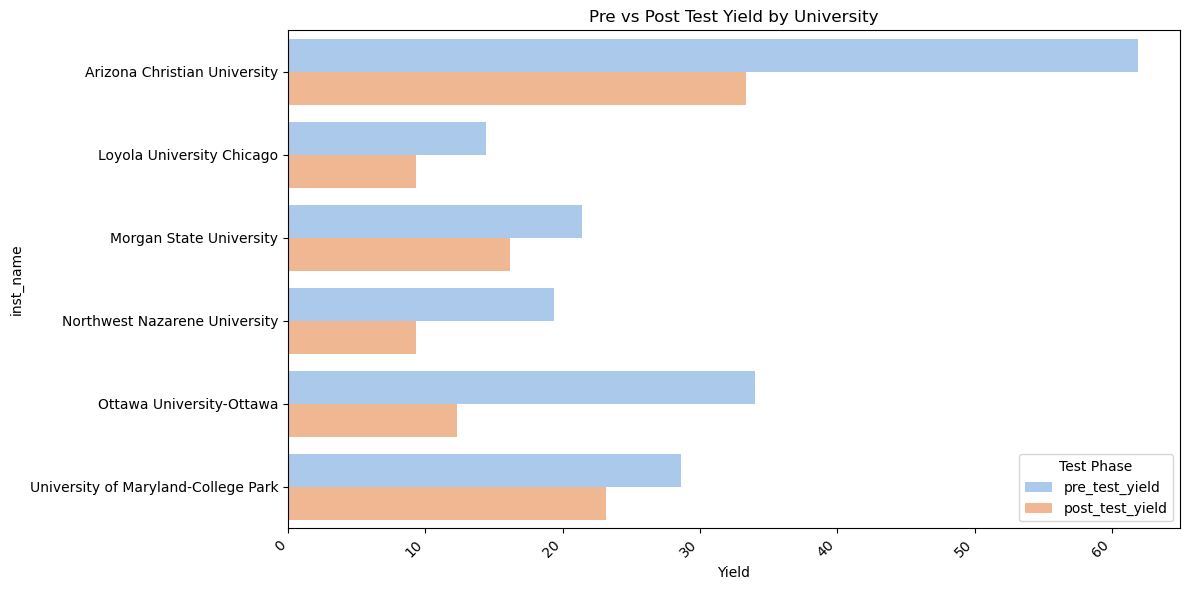

In [98]:
# Plot the data
ap_inc_ar_inc_ey_dec_melt = pd.melt(
                        ap_inc_ar_inc_ey_dec,
                        id_vars='inst_name',
                        value_vars=['pre_test_yield', 'post_test_yield'], 
                        var_name='Test Phase', 
                        value_name='Yield'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=ap_inc_ar_inc_ey_dec_melt, y='inst_name', x='Yield', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Yield by University')
plt.tight_layout()
plt.show()

#### **Among the increased application volume and decreased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?**

In [100]:
ap_inc_ar_dec_ey_inc = enrolled_comparison[(enrolled_comparison.pre_test_application < enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance > enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield < enrolled_comparison.post_test_yield)]

ap_inc_ar_dec_ey_inc

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield


In [101]:
print("{} universities observed increased in Admission Yield whose Application volume increased and Acceptance Rate decreased after adopting Test-Optional.".
      format(len(ap_inc_ar_dec_ey_inc)))

0 universities observed increased in Admission Yield whose Application volume increased and Acceptance Rate decreased after adopting Test-Optional.


#### **Among the increased application volume and decreased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?**

In [103]:
ap_inc_ar_dec_ey_dec = enrolled_comparison[(enrolled_comparison.pre_test_application < enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance > enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield > enrolled_comparison.post_test_yield)]

ap_inc_ar_dec_ey_dec

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
21,Bethany College,8007,6380,1304,79.68,20.44,11321,7789,865,68.80,11.11
35,Clemson University,86515,46228,11923,53.43,25.79,99826,45842,9181,45.92,20.03
36,Colgate University,28250,7027,2366,24.87,33.67,38649,5639,1699,14.59,30.13
40,Dallas Baptist University,10702,9977,1736,93.23,17.40,15435,14285,1373,92.55,9.61
93,Lubbock Christian University,1851,1693,856,91.46,50.56,1963,1723,589,87.77,34.18
108,Mount St. Joseph University,4433,2699,874,60.88,32.38,4638,2742,596,59.12,21.74
111,North Carolina A & T State University,42537,24884,6629,58.50,26.64,47290,26872,6005,56.82,22.35
159,The University of Montana,15765,14596,4313,92.58,29.55,16176,14471,3163,89.46,21.86


In [104]:
print("{} universities observed decreased in Admission Yield whose Application volume increased and Acceptance Rate decreased after adopting Test-Optional.".
      format(len(ap_inc_ar_dec_ey_dec)))

8 universities observed decreased in Admission Yield whose Application volume increased and Acceptance Rate decreased after adopting Test-Optional.


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Yield', ylabel='inst_name'>

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

Text(0.5, 1.0, 'Pre vs Post Test Yield by University')

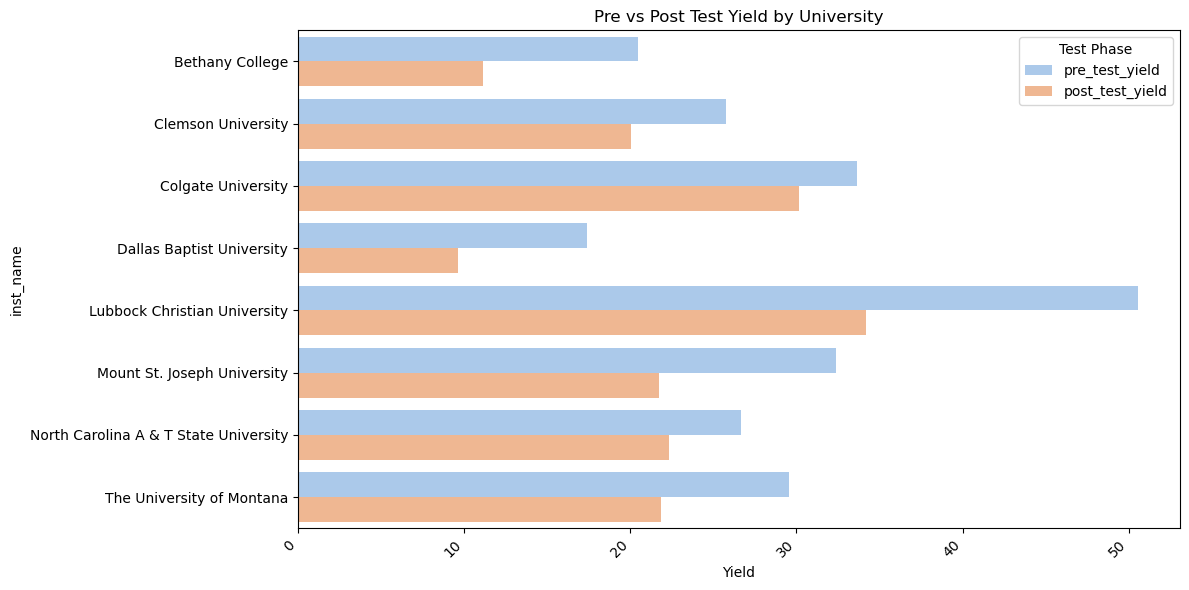

In [105]:
# Plot the data
ap_inc_ar_dec_ey_dec_melt = pd.melt(
                        ap_inc_ar_dec_ey_dec,
                        id_vars='inst_name',
                        value_vars=['pre_test_yield', 'post_test_yield'], 
                        var_name='Test Phase', 
                        value_name='Yield'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=ap_inc_ar_dec_ey_dec_melt, y='inst_name', x='Yield', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Yield by University')
plt.tight_layout()
plt.show()

#### **Among the decreased application volume and increased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?**

In [107]:
ap_dec_ar_inc_ey_inc = enrolled_comparison[(enrolled_comparison.pre_test_application > enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance < enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield < enrolled_comparison.post_test_yield)]

ap_dec_ar_inc_ey_inc

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
2,Adrian College,14790,8962,1728,60.59,19.28,6065,4378,1080,72.18,24.67
5,Alderson Broaddus University,10094,4697,752,46.53,16.01,3429,2196,453,64.04,20.63
18,Benedictine University,13369,7320,1205,54.75,16.46,5654,4884,840,86.38,17.20
33,Clark Atlanta University,47038,26002,2521,55.28,9.70,32871,18825,2280,57.27,12.11
39,Culver-Stockton College,9679,5521,799,57.04,14.47,3580,3368,505,94.08,14.99
43,Dominican University,14343,9728,1331,67.82,13.68,8962,7693,1062,85.84,13.80
56,Fayetteville State University,13599,9791,2032,72.00,20.75,8251,6737,1418,81.65,21.05
57,Fordham University,142174,68481,6655,48.17,9.72,93478,52530,5473,56.20,10.42
58,Fort Lewis College,11452,10450,2330,91.25,22.30,8737,8016,1809,91.75,22.57
62,Gordon College,8570,6223,1173,72.61,18.85,2911,2412,634,82.86,26.29


In [108]:
print("{} universities observed increase in Admission Yield whose Application volume decreased and Acceptance Rate increased after adopting Test-Optional.".
      format(len(ap_dec_ar_inc_ey_inc)))

26 universities observed increase in Admission Yield whose Application volume decreased and Acceptance Rate increased after adopting Test-Optional.


In [109]:
ap_dec_ar_inc_ey_inc[ap_dec_ar_inc_ey_inc.inst_name == 'Santa Clara University'][["inst_name", "pre_test_yield", "post_test_yield"]]

,inst_name,pre_test_yield,post_test_yield
140,Santa Clara University,16.54,17.95


**Santa Clara University's** admission yield increased from 16.54% to 17.95% after adopting Test-Optional.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Yield', ylabel='inst_name'>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

Text(0.5, 1.0, 'Pre vs Post Test Yield by University')

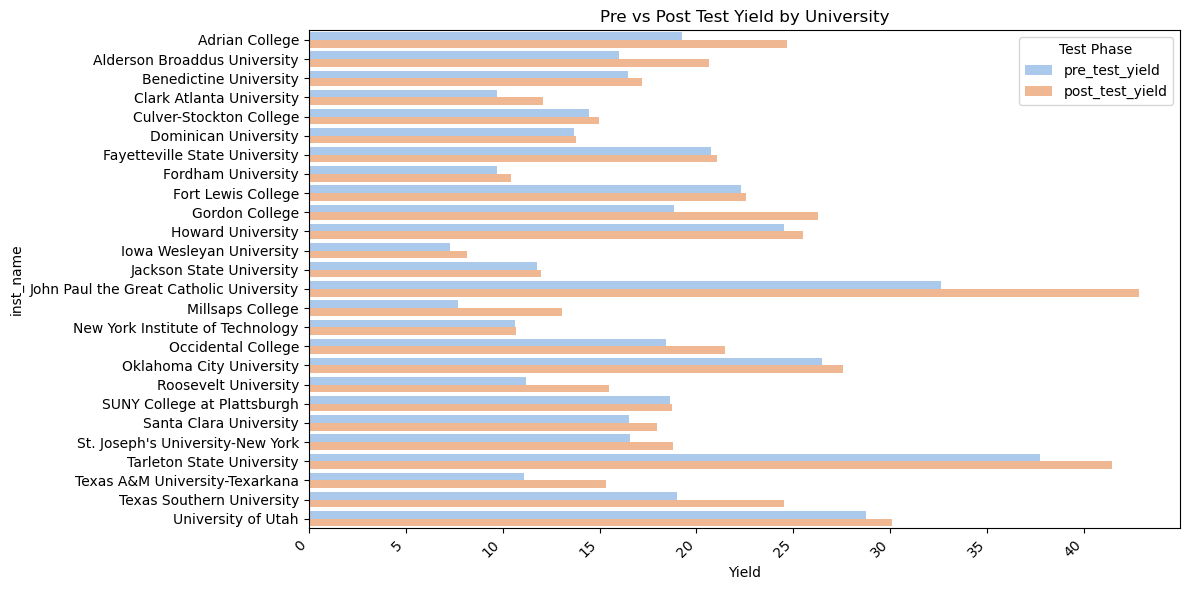

In [111]:
# Plot the data
ap_dec_ar_inc_ey_inc_melt = pd.melt(
                        ap_dec_ar_inc_ey_inc,
                        id_vars='inst_name',
                        value_vars=['pre_test_yield', 'post_test_yield'], 
                        var_name='Test Phase', 
                        value_name='Yield'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=ap_dec_ar_inc_ey_inc_melt, y='inst_name', x='Yield', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Yield by University')
plt.tight_layout()
plt.show()

#### **Among the decreased application volume and increased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?**

In [113]:
ap_dec_ar_inc_ey_dec = enrolled_comparison[(enrolled_comparison.pre_test_application > enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance < enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield > enrolled_comparison.post_test_yield)]

ap_dec_ar_inc_ey_dec

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
0,Adams State University,5153,5112,1207,99.20,23.61,3297,3281,621,99.51,18.93
1,Adelphi University,42254,31427,3373,74.38,10.73,33385,25050,2476,75.03,9.88
6,Alice Lloyd College,13070,3311,638,25.33,19.27,4097,2704,390,66.00,14.42
7,Alliance University,942,922,461,97.88,50.00,569,568,227,99.82,39.96
8,Andrews University,4312,2608,836,60.48,32.06,2335,2023,488,86.64,24.12
...,...,...,...,...,...,...,...,...,...,...,...
227,Wichita State University,19692,17412,4982,88.42,28.61,16190,15080,3661,93.14,24.28
228,Wilkes University,11321,9229,1692,81.52,18.33,8817,8326,1034,94.43,12.42
229,Winston-Salem State University,13947,9591,2909,68.77,30.33,13047,10013,1767,76.75,17.65
230,Winthrop University,17996,11975,3028,66.54,25.29,10681,7124,1527,66.70,21.43


In [114]:
print("{} universities observed decrease in Admission Yield whose Application volume decreased and Acceptance Rate increased after adopting Test-Optional.".
      format(len(ap_dec_ar_inc_ey_dec)))

129 universities observed decrease in Admission Yield whose Application volume decreased and Acceptance Rate increased after adopting Test-Optional.


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Pre-Test Yield')

Text(0, 0.5, 'Post-Test Yield')

Text(0.5, 1.0, 'Impact of Test-Optional Policy on Yield by University')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


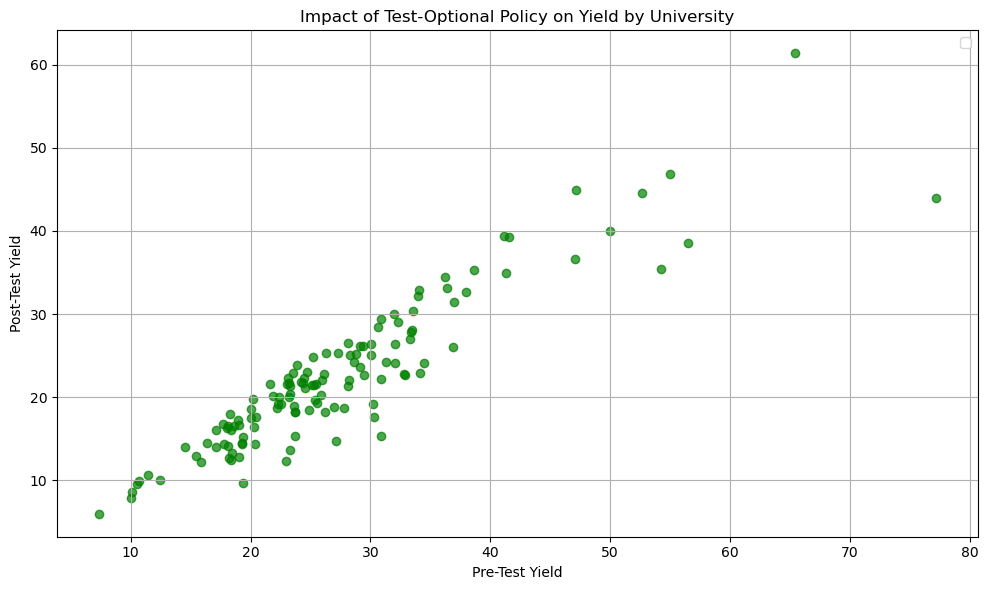

In [115]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ap_dec_ar_inc_ey_dec['pre_test_yield'], ap_dec_ar_inc_ey_dec['post_test_yield'], color='green', alpha=0.7)
plt.xlabel('Pre-Test Yield')
plt.ylabel('Post-Test Yield')
plt.title('Impact of Test-Optional Policy on Yield by University')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Among the decreased application volume and decreased acceptance rate, which universities’ admission yield increased after adopting Test-Optional?**

In [117]:
ap_dec_ar_dec_ey_inc = enrolled_comparison[(enrolled_comparison.pre_test_application > enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance > enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield < enrolled_comparison.post_test_yield)]

ap_dec_ar_dec_ey_inc

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
3,Alabama A & M University,29072,26285,4903,90.41,18.65,15467,10789,3258,69.75,30.20
4,Alabama State University,21484,21022,3036,97.85,14.44,12705,12356,1833,97.25,14.83
11,Ashland University,12557,8905,1652,70.92,18.55,8883,6299,1227,70.91,19.48
14,Barnard College,26628,3476,1927,13.05,55.44,22404,2248,1466,10.03,65.21
25,Boston University,187712,38287,9682,20.40,25.29,156574,25736,7646,16.44,29.71
32,Claremont McKenna College,17644,1917,968,10.86,50.50,11341,1224,680,10.79,55.56
37,Columbia University in the City of New York,123857,7426,4474,6.00,60.25,121989,4928,3181,4.04,64.55
41,Dartmouth College,67075,5772,3414,8.61,59.15,56692,3558,2345,6.28,65.91
42,Dickinson State University,1227,1219,627,99.35,51.44,1188,981,511,82.58,52.09
52,Emory University,85787,15193,4149,17.71,27.31,66614,8131,2918,12.21,35.89


In [118]:
print("{} universities observed increase in Admission Yield whose Application volume and Acceptance Rate decreased after adopting Test-Optional.".
      format(len(ap_dec_ar_dec_ey_inc)))

34 universities observed increase in Admission Yield whose Application volume and Acceptance Rate decreased after adopting Test-Optional.


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Yield', ylabel='inst_name'>

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

Text(0.5, 1.0, 'Pre vs Post Test Yield by University')

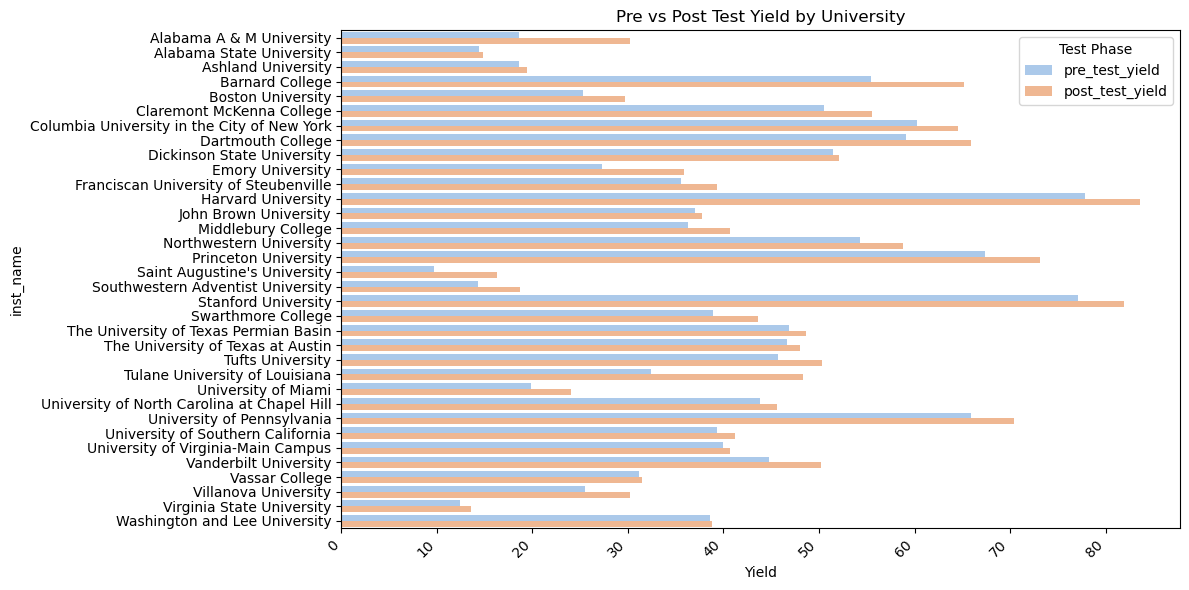

In [119]:
# Plot the data
ap_dec_ar_dec_ey_inc_melt = pd.melt(
                        ap_dec_ar_dec_ey_inc,
                        id_vars='inst_name',
                        value_vars=['pre_test_yield', 'post_test_yield'], 
                        var_name='Test Phase', 
                        value_name='Yield'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=ap_dec_ar_dec_ey_inc_melt, y='inst_name', x='Yield', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Yield by University')
plt.tight_layout()
plt.show()

#### **Among the decreased application volume and decreased acceptance rate, which universities’ admission yield decreased after adopting Test-Optional?**

In [121]:
ap_dec_ar_dec_ey_dec = enrolled_comparison[(enrolled_comparison.pre_test_application > enrolled_comparison.post_test_application) &
                                           (enrolled_comparison.pre_test_acceptance > enrolled_comparison.post_test_acceptance) &
                                           (enrolled_comparison.pre_test_yield > enrolled_comparison.post_test_yield)]

ap_dec_ar_dec_ey_dec

,inst_name,pre_test_application,pre_test_admission,pre_test_enrollment,pre_test_acceptance,pre_test_yield,post_test_application,post_test_admission,post_test_enrollment,post_test_acceptance,post_test_yield
13,Averett University,8198,5319,794,64.88,14.93,5786,3419,482,59.09,14.10
20,Berea College,5399,1809,1146,33.51,63.35,3953,1118,690,28.28,61.72
22,Bethel University,11421,8838,3134,77.38,35.46,8886,6695,1810,75.34,27.04
23,Biola University,12332,8515,2488,69.05,29.22,8578,5038,1361,58.73,27.01
38,Covenant College,1845,1801,678,97.62,37.65,1607,1387,508,86.31,36.63
46,East Central University,2864,2213,1506,77.27,68.05,2205,1491,939,67.62,62.98
53,Erskine College,3004,1890,969,62.92,51.27,2635,1502,533,57.00,35.49
67,Holy Cross College,1773,1521,566,85.79,37.21,1570,1257,417,80.06,33.17
90,Louisiana State University and Agricultural & ...,77741,57548,18645,74.03,32.40,75414,55326,14446,73.36,26.11
94,Macalester College,18956,7063,1670,37.26,23.64,17480,5225,1153,29.89,22.07


In [122]:
print("{} universities observed decrease in Admission Yield whose Application volume and Acceptance Rate decreased after adopting Test-Optional.".
      format(len(ap_dec_ar_dec_ey_dec)))

30 universities observed decrease in Admission Yield whose Application volume and Acceptance Rate decreased after adopting Test-Optional.


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Yield', ylabel='inst_name'>

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

Text(0.5, 1.0, 'Pre vs Post Test Yield by University')

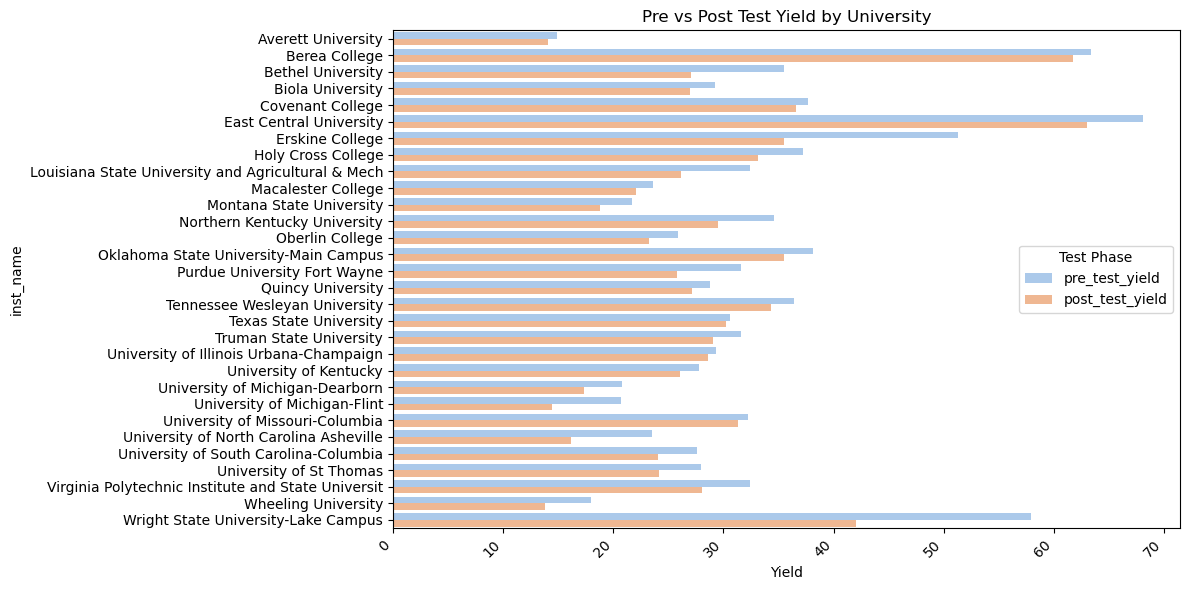

In [123]:
# Plot the data
ap_dec_ar_dec_ey_dec_melt = pd.melt(
                        ap_dec_ar_dec_ey_dec,
                        id_vars='inst_name',
                        value_vars=['pre_test_yield', 'post_test_yield'], 
                        var_name='Test Phase', 
                        value_name='Yield'
                        )

plt.figure(figsize=(12, 6))
sns.barplot(data=ap_dec_ar_dec_ey_dec_melt, y='inst_name', x='Yield', hue='Test Phase', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Pre vs Post Test Yield by University')
plt.tight_layout()
plt.show()

**Interpretation of Enroll Stage**

<ul>
    <li>None of the universities observed increased in Admission Yield whose Application volume and Acceptance Rate increased after adopting Test-Optional</li>
    <li>6 universities observed decreased in Admission Yield whose Application volume and Acceptance Rate increased after adopting Test-Optional</li>
    <li>None of the universities observed increased in Admission Yield whose Application volume increased and Acceptance Rate decreased after adopting Test-Optional</li>
    <li>8 universities observed decreased in Admission Yield whose Application volume increased and Acceptance Rate decreased after adopting Test-Optional</li>
    <li>26 universities observed increase in Admission Yield whose Application volume decreased and Acceptance Rate increased after adopting Test-Optional</li>
    <li>Santa Clara University's admission yield increased from 16.54% to 17.95% when Application volume decreased and Acceptance Rate increased after adopting Test-Optional</li>
    <li>129 universities observed decrease in Admission Yield whose Application volume decreased and Acceptance Rate increased after adopting Test-Optional</li>
    <li>34 universities observed increase in Admission Yield whose Application volume and Acceptance Rate decreased after adopting Test-Optional</li>
    <li>30 universities observed decrease in Admission Yield whose Application volume and Acceptance Rate decreased after adopting Test-Optional</li>
    <li>Since, majority of the universities observed decline in Admission Yield. Therefore, hypothesis 3 is not supported</li>
</ul>

### **Conclusion**

The adoption of test-optional policies did not lead to a significant or consistent improvement across the college admissions funnel. The majority of universities experienced no increase in applications, showed a trend toward higher acceptance rates, and saw declines in enrollment yield. Although the policy aimed to broaden access and attract a more diverse applicant pool, the data indicates that its impact has been limited and varied across institutions.